# Setup

This Experiment is the main experiment of the work, consists in run an optimized Random Forest in order to try to predict the values in question.(https://www.researchgate.net/publication/221533996_From_an_artificial_neural_network_to_a_stock_market_day-trading_system_A_case_study_on_the_BMF_BOVESPA).

In [1]:
import numpy as np
import pandas as pd

import Utils 
from Utils import calculateEMA, calculateBB, addPreviousDays, removeColumns, getPeriod, mape, mae, createDate, getDate, printResult

import matplotlib.pyplot as plt
import matplotlib.dates as mpdates
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

### Constants and Parameters

In [2]:
dfColumns = ['date','open', 'high', 'low','close','tickvol','volume','spread']
newColumns = ['open', 'high', 'low', 'close']
col15 = ['open','d-5_high','d-5_low','d-4_high','d-4_low','d-3_high','d-3_low','d-2_high','d-2_low','d-1_high','d-1_low','EMA_high','EMA_low','UB_close','LB_close']
col25 = ['open','d-5_open','d-5_high','d-5_low','d-5_close','d-4_open','d-4_high','d-4_low','d-4_close','d-3_open','d-3_high','d-3_low','d-3_close','d-2_open','d-2_high','d-2_low','d-2_close','d-1_open','d-1_high','d-1_low','d-1_close','EMA_high' ,'EMA_low','UB_close','LB_close']
DAYS = 5
TEST_BEGIN = '2021.04.06'
TEST_END = '2021.06.01'
TRAIN_BEGIN = '2018.03.30'
TRAIN_END = '2021.04.05'
TIMES = 10

### Opening the dataset

In [3]:
df = pd.read_csv('../Data/PETR4_Daily.csv', sep = "\t")
df.columns = dfColumns
df = removeColumns(df, ['tickvol', 'volume','spread'])

df2 = pd.read_csv('../Data/VALE3_Daily.csv', sep = "\t")

df2.columns = dfColumns
df2 = removeColumns(df2, ['tickvol', 'volume','spread'])

df 
df.tail(290)

,date,open,high,low,close
1049,2020.03.31,13.16,14.07,13.16,13.54
1050,2020.04.01,13.01,14.08,12.89,13.84
1051,2020.04.02,14.90,16.01,14.52,15.01
1052,2020.04.03,15.77,15.83,14.44,14.84
1053,2020.04.06,15.53,15.58,14.69,15.26
...,...,...,...,...,...
1334,2021.05.26,25.91,26.18,25.65,26.09
1335,2021.05.27,26.08,26.25,25.77,25.91
1336,2021.05.28,26.20,27.02,26.15,26.99
1337,2021.05.31,26.96,27.20,26.78,26.87


In [4]:
#PETR4
df = calculateEMA(df,DAYS,newColumns)
df = calculateBB(df,DAYS,newColumns)
df = addPreviousDays(df,DAYS, newColumns)

#VALE3
df2 = calculateEMA(df2,DAYS,newColumns)
df2 = calculateBB(df2,DAYS,newColumns)
df2 = addPreviousDays(df2,DAYS, newColumns)

In [5]:
initialDf_PETR4 = getPeriod(df, '2016.01.04','2021.06.01', True)
initialDf_VALE3 = getPeriod(df2, '2016.01.04','2021.06.01', True)

In [6]:
initialDf_PETR4

,date,open,high,low,close,EMA_open,EMA_high,EMA_low,EMA_close,UB_open,...,d-3_low,d-3_close,d-4_open,d-4_high,d-4_low,d-4_close,d-5_open,d-5_high,d-5_low,d-5_close
0,2016.01.04,5.96,6.38,5.94,6.23,5.960000,6.380000,5.940000,6.230000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016.01.05,6.28,6.35,6.00,6.06,6.280000,6.350000,6.000000,6.060000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016.01.06,5.92,5.93,5.80,5.80,5.920000,5.930000,5.800000,5.800000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016.01.07,5.61,5.83,5.51,5.68,5.610000,5.830000,5.510000,5.680000,NaN,...,5.94,6.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016.01.08,5.79,5.85,5.56,5.69,6.053333,6.220000,5.913333,6.030000,6.405842,...,6.00,6.06,5.96,6.38,5.94,6.23,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,2021.05.26,25.91,26.18,25.65,26.09,26.114791,26.354219,25.760657,26.042263,26.608719,...,25.94,25.95,26.15,26.28,25.72,25.93,25.85,26.35,25.80,26.15
1335,2021.05.27,26.08,26.25,25.77,25.91,26.103194,26.319479,25.763771,25.998175,26.604087,...,25.99,26.39,26.08,26.31,25.94,25.95,26.15,26.28,25.72,25.93
1336,2021.05.28,26.20,27.02,26.15,26.99,26.135462,26.552986,25.892514,26.328784,26.617551,...,25.78,25.84,26.28,26.52,25.99,26.39,26.08,26.31,25.94,25.95
1337,2021.05.31,26.96,27.20,26.78,26.87,26.410308,26.768657,26.188343,26.509189,27.147657,...,25.65,26.09,26.48,26.62,25.78,25.84,26.28,26.52,25.99,26.39


In [7]:
initialDf_VALE3

,date,open,high,low,close,EMA_open,EMA_high,EMA_low,EMA_close,UB_open,...,d-3_low,d-3_close,d-4_open,d-4_high,d-4_low,d-4_close,d-5_open,d-5_high,d-5_low,d-5_close
0,2016.01.04,10.57,10.99,10.56,10.74,10.570000,10.990000,10.560000,10.740000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016.01.05,10.73,10.87,10.50,10.60,10.730000,10.870000,10.500000,10.600000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016.01.06,10.23,10.25,9.81,9.82,10.230000,10.250000,9.810000,9.820000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016.01.07,9.53,9.62,9.21,9.24,9.530000,9.620000,9.210000,9.240000,NaN,...,10.56,10.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016.01.08,9.37,9.52,8.92,8.92,10.510000,10.703333,10.290000,10.386667,11.307278,...,10.50,10.60,10.57,10.99,10.56,10.74,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,2021.05.26,106.37,110.32,106.03,110.20,109.166674,111.131617,107.622606,109.807900,113.973861,...,108.50,109.40,111.70,112.10,110.20,111.11,112.10,112.78,109.84,112.25
1335,2021.05.27,110.80,112.09,109.77,110.99,109.711116,111.451078,108.338404,110.201933,113.405981,...,107.51,109.78,111.11,111.25,108.50,109.40,111.70,112.10,110.20,111.11
1336,2021.05.28,111.11,112.75,109.42,111.59,110.177411,111.884052,108.698936,110.664622,113.405981,...,106.78,107.05,108.00,110.14,107.51,109.78,111.11,111.25,108.50,109.40
1337,2021.05.31,112.50,114.89,112.50,114.78,110.951607,112.886035,109.965957,112.036415,114.811204,...,106.03,110.20,110.28,110.89,106.78,107.05,108.00,110.14,107.51,109.78


### Experimento Adrion:

In [8]:
def exp(df, inputColumns = []):
    #df = getPeriod(df, '2020.03.02','2021.04.30', True)
    #print(df)
    
    df_train = getPeriod(df, TRAIN_BEGIN, TRAIN_END)
    df_test = getPeriod(df, TEST_BEGIN, TEST_END)
    
    if(inputColumns == []):
        x_train = df_train.drop(['date', 'high', 'low', 'close'], axis=1)
        y_train = df_train[['high','low']]

        x_test = df_test.drop(['date', 'high', 'low', 'close'], axis=1)
        y_test = df_test[['high','low']]
    else:
        x_train = df_train[inputColumns]
        y_train = df_train[['high','low']]

        x_test = df_test[inputColumns]
        y_test = df_test[['high','low']]

    rf = RandomForestRegressor(n_estimators = 500)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    
    errorMax = mape(y_test['high'],y_pred[:,0])
    errorMin = mape(y_test['low'],y_pred[:,1])
    
    return errorMax, errorMin

def test30timesExp(df, phrase, columnInput = []):
    errorMax = []
    errorMin = []
    
    for i in range(1, TIMES+1):
        if(columnInput == []):
            errorMax_petr4, errorMin_petr4 = exp(df)
        else: 
            errorMax_petr4, errorMin_petr4 = exp(df, columnInput)
            
        errorMax.append(errorMax_petr4[0])
        errorMin.append(errorMin_petr4[0])
    
    errorMax = np.array(errorMax)
    errorMin = np.array(errorMin)
    print(phrase)
    printResult((errorMax.mean(),errorMax.std()), 'High')
    printResult((errorMin.mean(),errorMin.std()), 'Low')
    
test30timesExp(initialDf_PETR4, 'PETR4 15 Variables', col15) 
test30timesExp(initialDf_PETR4, 'PETR4 25 Variables', col25) 
test30timesExp(initialDf_PETR4, 'PETR4 33 Variables') 
print('\n')
test30timesExp(initialDf_VALE3, 'VALE3 15 Variables', col15) 
test30timesExp(initialDf_VALE3, 'VALE3 25 Variables', col25) 
test30timesExp(initialDf_VALE3, 'VALE3 33 Variables')     

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
df4 = getPeriod(initialDf_PETR4, '2020.03.02','2021.04.30', True)

df_train = getPeriod(df4, '2020.03.02','2021.03.31')
df_test = getPeriod(df4, '2021.04.01','2021.04.30')

x_train = df_train.drop(['date', 'high', 'low', 'close'], axis=1)
y_train = df_train[['high','low']]

x_test = df_test.drop(['date', 'high', 'low', 'close'], axis=1)
y_test = df_test[['high','low']]

rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print (mape(y_test['high'],y_pred[:,0]))
print (mape(y_test['low'],y_pred[:,1]))
print (mae(y_test['high'],y_pred[:,0]))
print (mae(y_test['low'],y_pred[:,1]))

(1.2097407745304578, 1.1680444381642863)
(0.816605545046884, 0.6794028981892051)
(0.29008449999985864, 0.2887711786948039)
(0.1901740000000734, 0.15932806398754892)


Feature: open, Score: 0.88575
Feature: EMA_open, Score: 0.00110
Feature: EMA_high, Score: 0.00360
Feature: EMA_low, Score: 0.00891
Feature: EMA_close, Score: 0.01701
Feature: UB_open, Score: 0.00031
Feature: LB_open, Score: 0.00919
Feature: UB_high, Score: 0.00064
Feature: LB_high, Score: 0.00677
Feature: UB_low, Score: 0.00122
Feature: LB_low, Score: 0.00278
Feature: UB_close, Score: 0.00115
Feature: LB_close, Score: 0.01141
Feature: d-1_open, Score: 0.00179
Feature: d-1_high, Score: 0.00763
Feature: d-1_low, Score: 0.01096
Feature: d-1_close, Score: 0.02327
Feature: d-2_open, Score: 0.00018
Feature: d-2_high, Score: 0.00029
Feature: d-2_low, Score: 0.00209
Feature: d-2_close, Score: 0.00153
Feature: d-3_open, Score: 0.00012
Feature: d-3_high, Score: 0.00013
Feature: d-3_low, Score: 0.00037
Feature: d-3_close, Score: 0.00041
Feature: d-4_open, Score: 0.00014
Feature: d-4_high, Score: 0.00016
Feature: d-4_low, Score: 0.00013
Feature: d-4_close, Score: 0.00018
Feature: d-5_open, Score: 

<BarContainer object of 33 artists>

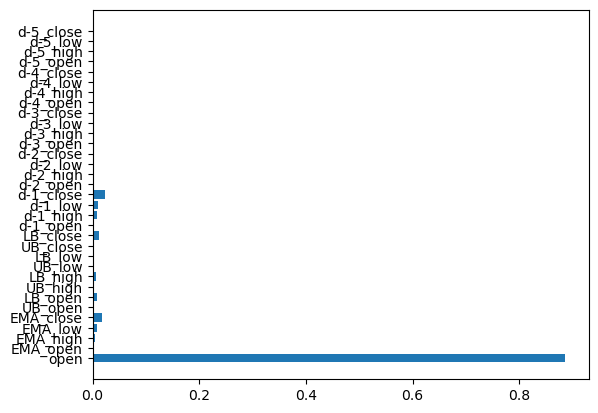

In [ ]:
importance = rf.feature_importances_
feature_names = x_train.columns  
for name, score in zip(feature_names, importance):
    print(f'Feature: {name}, Score: {score:.5f}')

importance

from matplotlib import pyplot as plt
plt.barh(x_train.columns, rf.feature_importances_)

In [ ]:
def exp041(df, inputColumns = []):
    #df = getPeriod(df, '2020.03.02','2021.04.30', True)
    
    #print(df)
    df_train = getPeriod(df, TRAIN_BEGIN, TRAIN_END)
    df_test = getPeriod(df, TEST_BEGIN, TEST_END)
    
    if(inputColumns == []):
        x_train = df_train.drop(['date', 'high', 'low', 'close'], axis=1)
        y_train = df_train[['high','low']]

        x_test = df_test.drop(['date', 'high', 'low', 'close'], axis=1)
        y_test = df_test[['high','low']]
    else:
        x_train = df_train[inputColumns]
        y_train = df_train[['high','low']]

        x_test = df_test[inputColumns]
        y_test = df_test[['high','low']]

    for i in range(1, 5):    
        rf = RandomForestRegressor(n_estimators = 300)
        rf.fit(x_train, y_train)
        y_pred = rf.predict(x_test)
        
        print(i)
        errorMax = mape(y_test['high'],y_pred[:,0])
        errorMin = mape(y_test['low'],y_pred[:,1])
        printResult(errorMax, 'High')
        printResult(errorMin, 'Low')
    
    importance = rf.feature_importances_
    
    featureImp = []
    for feat, importance in zip(x_train.columns, rf.feature_importances_):  
        temp = [feat, importance*100]
        featureImp.append(temp)

    #fT_df = pd.DataFrame(featureImp, columns = ['Feature', 'Importance'])
    #print (fT_df.sort_values('Importance', ascending = False))
    
    #print (mape(y_test['high'],y_pred[:,0]))
    #print (mape(y_test['low'],y_pred[:,1]))
    #print (mae(y_test['high'],y_pred[:,0]))
    #print (mae(y_test['low'],y_pred[:,1]))
    
    return errorMax, errorMin, y_pred, y_test

a,b,c,d = exp041(initialDf_PETR4)

e,f,g,h = exp041(initialDf_VALE3)

1
High: 1.05 +- 0.94 %
Low: 0.68 +- 0.44 %
2
High: 1.1 +- 0.93 %
Low: 0.69 +- 0.44 %
3
High: 1.05 +- 0.94 %
Low: 0.65 +- 0.44 %
4
High: 1.08 +- 0.93 %
Low: 0.69 +- 0.46 %
1
High: 7.95 +- 3.38 %
Low: 8.63 +- 2.99 %
2
High: 7.83 +- 3.37 %
Low: 8.55 +- 2.98 %
3
High: 8.05 +- 3.37 %
Low: 8.68 +- 2.98 %
4
High: 7.88 +- 3.39 %
Low: 8.58 +- 2.99 %


In [ ]:
printResult(a, 'High')
printResult(b, 'Low')

High: 1.08 +- 0.93 %
Low: 0.69 +- 0.46 %


In [ ]:
d['high_pred'] = c[:,0]
d['low_pred'] = c[:,1]
d['date'] = getPeriod(initialDf_PETR4, TEST_BEGIN, TEST_END)['date']
d.to_pickle('../Data/PETR4_Pred.pkl')
d.tail(10)


,high,low,high_pred,low_pred,date
589,26.35,25.80,26.535933,25.722600,2021.05.19
590,26.28,25.72,26.385000,25.679233,2021.05.20
591,26.31,25.94,26.491167,25.709767,2021.05.21
592,26.52,25.99,26.617400,25.806100,2021.05.24
593,26.62,25.78,26.718667,25.938800,2021.05.25
594,26.18,25.65,26.325033,25.600600,2021.05.26
595,26.25,25.77,26.362300,25.643967,2021.05.27
596,27.02,26.15,26.872600,26.006533,2021.05.28
597,27.20,26.78,27.203500,26.543933,2021.05.31
598,27.70,27.01,27.576467,27.126167,2021.06.01


In [ ]:
h['high_pred'] = g[:,0]
h['low_pred'] = g[:,1]
h['date'] = getPeriod(initialDf_VALE3, TEST_BEGIN, TEST_END)['date']
h.to_pickle('../Data/VALE3_Pred.pkl')
h.tail(10)

,high,low,high_pred,low_pred,date
589,112.78,109.84,102.342633,99.039733,2021.05.19
590,112.10,110.20,102.342633,99.039733,2021.05.20
591,111.25,108.50,102.342633,99.039733,2021.05.21
592,110.14,107.51,102.342633,99.039733,2021.05.24
593,110.89,106.78,102.342633,99.039733,2021.05.25
594,110.32,106.03,102.342633,99.039733,2021.05.26
595,112.09,109.77,102.342633,99.039733,2021.05.27
596,112.75,109.42,102.342633,99.039733,2021.05.28
597,114.89,112.50,102.342633,99.039733,2021.05.31
598,118.00,113.20,102.342633,99.039733,2021.06.01


In [ ]:
initialDf_PETR4

,date,open,high,low,close,EMA_open,EMA_high,EMA_low,EMA_close,UB_open,...,d-3_low,d-3_close,d-4_open,d-4_high,d-4_low,d-4_close,d-5_open,d-5_high,d-5_low,d-5_close
0,2019.01.02,21.18,22.73,20.93,22.60,20.609175,21.499077,20.380957,21.271656,21.776315,...,19.18,20.37,19.55,20.08,19.41,19.69,20.38,20.39,19.50,19.63
1,2019.01.03,22.51,23.32,22.36,23.16,21.242783,22.106051,21.040638,21.901104,23.157151,...,19.99,20.36,19.34,20.37,19.18,20.37,19.55,20.08,19.41,19.69
2,2019.01.04,23.35,23.43,22.99,23.22,21.945189,22.547367,21.690425,22.340736,24.186721,...,20.74,21.31,20.22,20.65,19.99,20.36,19.34,20.37,19.18,20.37
3,2019.01.07,23.35,24.35,23.20,23.59,22.413459,23.148245,22.193617,22.757157,24.644733,...,20.93,22.60,20.77,21.45,20.74,21.31,20.22,20.65,19.99,20.36
4,2019.01.08,23.86,23.88,23.27,23.45,22.895640,23.392163,22.552411,22.988105,24.953473,...,22.36,23.16,21.18,22.73,20.93,22.60,20.77,21.45,20.74,21.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2021.05.26,25.91,26.18,25.65,26.09,26.114791,26.354219,25.760657,26.042263,26.608719,...,25.94,25.95,26.15,26.28,25.72,25.93,25.85,26.35,25.80,26.15
595,2021.05.27,26.08,26.25,25.77,25.91,26.103194,26.319479,25.763771,25.998175,26.604087,...,25.99,26.39,26.08,26.31,25.94,25.95,26.15,26.28,25.72,25.93
596,2021.05.28,26.20,27.02,26.15,26.99,26.135462,26.552986,25.892514,26.328784,26.617551,...,25.78,25.84,26.28,26.52,25.99,26.39,26.08,26.31,25.94,25.95
597,2021.05.31,26.96,27.20,26.78,26.87,26.410308,26.768657,26.188343,26.509189,27.147657,...,25.65,26.09,26.48,26.62,25.78,25.84,26.28,26.52,25.99,26.39


# Testes Joao

In [10]:
def exp041(df, inputColumns = []):
    
    df_train = getPeriod(df, '2016.03.29', '2021.04.05')
    df_test = getPeriod(df, '2021.04.06', '2021.06.01')
    
    if(inputColumns == []):
        x_train = df_train.drop(['date', 'high', 'low', 'close'], axis=1)
        y_train = df_train[['high','low']]

        x_test = df_test.drop(['date', 'high', 'low', 'close'], axis=1)
        y_test = df_test[['high','low']]
    else:
        x_train = df_train[inputColumns]
        y_train = df_train[['high','low']]

        x_test = df_test[inputColumns]
        y_test = df_test[['high','low']]

    for i in range(1, 5):    
        rf = RandomForestRegressor(n_estimators = 300)
        rf.fit(x_train, y_train)
        # Obter previsões individuais de cada árvore
        predictions_per_tree = np.array([tree.predict(x_test) for tree in rf.estimators_])
        print(predictions_per_tree.shape)
        print(predictions_per_tree[0])
        # Média das predições (previsão final)
        y_pred = predictions_per_tree.mean(axis=0)
        # Desvio padrão como medida de incerteza/confiança
        uncertainty = predictions_per_tree.std(axis=0)
        
        print(i)
        errorMax = mape(y_test['high'],y_pred[:,0])
        errorMin = mape(y_test['low'],y_pred[:,1])
        printResult(errorMax, 'High')
        printResult(errorMin, 'Low')
    
    return errorMax, errorMin, y_pred, y_test, uncertainty

a,b,c,d,e = exp041(initialDf_PETR4)

f,g,h,i,j = exp041(initialDf_VALE3)

(300, 40, 2)
[[23.39 23.17]
 [23.01 22.48]
 [23.39 23.17]
 [23.56 22.61]
 [23.56 22.61]
 [23.56 22.61]
 [23.56 22.61]
 [23.87 23.55]
 [23.39 23.17]
 [23.39 23.17]
 [24.39 24.01]
 [24.57 23.38]
 [23.94 23.42]
 [24.36 23.76]
 [24.11 23.5 ]
 [23.39 23.17]
 [24.29 23.17]
 [23.39 23.17]
 [24.01 23.75]
 [23.9  23.  ]
 [23.39 23.17]
 [24.01 23.75]
 [24.01 23.75]
 [25.28 24.64]
 [25.49 24.05]
 [24.96 24.48]
 [24.96 24.48]
 [26.2  25.67]
 [26.27 25.6 ]
 [26.44 25.37]
 [26.26 25.6 ]
 [26.44 25.84]
 [27.28 26.25]
 [27.28 26.25]
 [27.53 26.42]
 [26.17 25.8 ]
 [27.28 26.25]
 [27.28 26.25]
 [27.11 26.79]
 [27.61 27.23]]
1
High: 0.79 +- 0.98 %
Low: 0.67 +- 0.52 %
(300, 40, 2)
[[23.63 22.88]
 [23.63 22.88]
 [23.63 22.88]
 [23.45 22.9 ]
 [23.71 22.92]
 [23.63 22.88]
 [23.63 22.88]
 [24.01 23.75]
 [23.63 22.88]
 [23.45 22.9 ]
 [25.03 23.1 ]
 [24.42 23.89]
 [24.05 23.15]
 [24.11 23.5 ]
 [24.11 23.5 ]
 [23.65 23.05]
 [24.36 23.93]
 [23.67 23.34]
 [23.98 23.58]
 [23.75 23.23]
 [23.75 23.23]
 [24.34 23.75]


## Análise incerteza PETR4

In [11]:
d['high_pred'] = c[:,0]
d['low_pred'] = c[:,1]
d['uncertainty'] = e[:,0]
d['date'] = getPeriod(initialDf_PETR4, TEST_BEGIN, TEST_END)['date']
d.to_pickle('../Data/PETR4_Pred_with_confidence.pkl')
d.tail(10)

,high,low,high_pred,low_pred,uncertainty,date
1329,26.35,25.80,26.151000,25.544200,0.278512,2021.05.19
1330,26.28,25.72,26.319833,25.848567,0.187285,2021.05.20
1331,26.31,25.94,26.267100,25.811167,0.230182,2021.05.21
1332,26.52,25.99,26.355933,25.886133,0.259371,2021.05.24
1333,26.62,25.78,26.626433,26.186667,0.242609,2021.05.25
1334,26.18,25.65,26.155300,25.673433,0.202816,2021.05.26
1335,26.25,25.77,26.236233,25.787600,0.181887,2021.05.27
1336,27.02,26.15,26.455167,25.849800,0.327225,2021.05.28
1337,27.20,26.78,27.254400,26.685267,0.270751,2021.05.31
1338,27.70,27.01,27.629133,27.086433,0.175522,2021.06.01


Number of samples with uncertainty under 0.21: 9
Number of samples with uncertainty under 0.26: 20
Number of samples with uncertainty under 0.3: 31
Number of samples with uncertainty under 0.4: 39
Number of samples with uncertainty under 0.5: 40
Number of samples with uncertainty under 0.6: 40
Number of samples with uncertainty under 0.7: 40
Number of samples with uncertainty under 0.8: 40
Number of samples with uncertainty under 0.9: 40


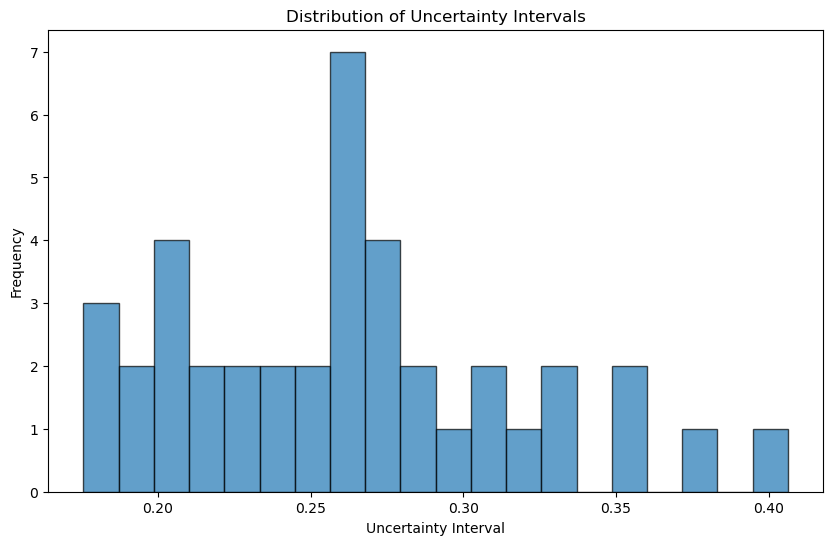

In [12]:
# Calculate the percentage of samples with uncenrtainty under certain thresholds
thresholds = [0.21,0.26,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9]
counts = [(d['uncertainty'] < threshold).sum() for threshold in thresholds]

# Display the counts
for threshold, count in zip(thresholds, counts):
    print(f'Number of samples with uncertainty under {threshold}: {count}')

# Plot the distribution of the confidence column
plt.figure(figsize=(10, 6))
plt.hist(d['uncertainty'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Uncertainty Intervals')
plt.xlabel('Uncertainty Interval')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Filter the samples with uncertainty under 0.5
filtered_df = d[d['uncertainty'] < 0.5]

# Calculate the proximity for high and low predictions
filtered_df['high_proximity'] = abs(filtered_df['high_pred'] - filtered_df['high'])
filtered_df['low_proximity'] = abs(filtered_df['low_pred'] - filtered_df['low'])

# Display the filtered dataframe with proximity columns
filtered_df[['date', 'high', 'high_pred', 'high_proximity', 'low', 'low_pred', 'low_proximity', 'uncertainty']]

,date,high,high_pred,high_proximity,low,low_pred,low_proximity,uncertainty
1299,2021.04.06,23.58,23.625300,0.045300,23.13,23.031567,0.098433,0.296067
1300,2021.04.07,23.55,23.601000,0.051000,23.15,23.061300,0.088700,0.267084
1301,2021.04.08,23.26,23.568533,0.308533,22.61,23.019733,0.409733,0.223925
1302,2021.04.09,23.01,23.182667,0.172667,22.61,22.523600,0.086400,0.285223
1303,2021.04.12,23.58,23.700367,0.120367,23.01,22.964233,0.045767,0.406344
1304,2021.04.13,23.33,23.591733,0.261733,22.92,22.968367,0.048367,0.262238
1305,2021.04.14,23.78,23.684533,0.095467,23.20,23.018400,0.181600,0.304240
1306,2021.04.15,23.83,23.852167,0.022167,23.02,23.296367,0.276367,0.258455
1307,2021.04.16,23.24,23.552500,0.312500,22.81,22.950867,0.140867,0.254399
1308,2021.04.19,24.89,23.424567,1.465433,22.77,22.697200,0.072800,0.359003


## Análise incerteza VALE3

In [14]:
i['high_pred'] = h[:,0]
i['low_pred'] = h[:,1]
i['uncertainty'] = j[:,0]
i['date'] = getPeriod(initialDf_VALE3, TEST_BEGIN, TEST_END)['date']
i.to_pickle('../Data/VALE3_Pred_with_confidence.pkl')
i.tail(10)

,high,low,high_pred,low_pred,uncertainty,date
1329,112.78,109.84,102.0412,98.8728,1.909782,2021.05.19
1330,112.10,110.20,102.0412,98.8728,1.909782,2021.05.20
1331,111.25,108.50,102.0412,98.8728,1.909782,2021.05.21
1332,110.14,107.51,102.0412,98.8728,1.909782,2021.05.24
1333,110.89,106.78,102.0412,98.8728,1.909782,2021.05.25
1334,110.32,106.03,102.0412,98.8728,1.909782,2021.05.26
1335,112.09,109.77,102.0412,98.8728,1.909782,2021.05.27
1336,112.75,109.42,102.0412,98.8728,1.909782,2021.05.28
1337,114.89,112.50,102.0412,98.8728,1.909782,2021.05.31
1338,118.00,113.20,102.0412,98.8728,1.909782,2021.06.01


In [15]:
i['uncertainty'].describe()

count    40.000000
mean      1.912294
std       0.014539
min       1.892465
25%       1.909782
50%       1.909782
75%       1.909782
max       1.979089
Name: uncertainty, dtype: float64

In [23]:
i['low_pred'].describe()

count    40.000000
mean     98.874867
std       0.012089
min      98.849200
25%      98.872800
50%      98.872800
75%      98.872800
max      98.938433
Name: low_pred, dtype: float64

Number of samples with uncertainty under 1.908: 2


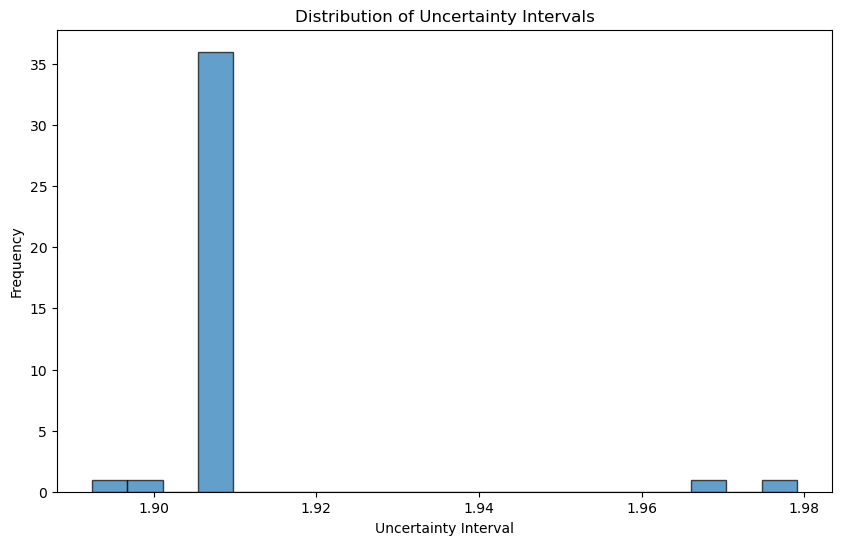

In [19]:
# Calculate the percentage of samples with uncenrtainty under certain thresholds
thresholds = [1.908]
counts = [(i['uncertainty'] < threshold).sum() for threshold in thresholds]

# Display the counts
for threshold, count in zip(thresholds, counts):
    print(f'Number of samples with uncertainty under {threshold}: {count}')

# Plot the distribution of the confidence column
plt.figure(figsize=(10, 6))
plt.hist(i['uncertainty'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Uncertainty Intervals')
plt.xlabel('Uncertainty Interval')
plt.ylabel('Frequency')
plt.show()